In [9]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

data_2021 = pd.read_csv('../DATASET/2021/Hasil_2021.csv')
data_2022 = pd.read_csv('../DATASET/2022/Hasil_2022.csv')
data_2023 = pd.read_csv('../DATASET/2023/Hasil_2023.csv')
data_JP = pd.read_csv('../DATASET/Jumlah penduduk/Jumlah Penduduk .csv')
data_KP = pd.read_csv('../DATASET/Kapasitas Pembangkit/Kapasitas Pembangkit Listrik.csv')
data_final = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

datasets = {
    '2021': data_2021,
    '2022': data_2022,
    '2023': data_2023
}

       Residential_2021  Industrial_2021  Business_2021  Social_2021  \
count         34.000000        34.000000      34.000000    34.000000   
mean        3367.015882      2354.655000    1286.292647   252.905882   
std         5011.002016      5423.450648    2228.240221   372.918180   
min          296.130000         6.150000      57.080000    19.690000   
25%          749.770000        60.605000     218.365000    53.425000   
50%         1441.680000       229.430000     509.655000    92.902500   
75%         3007.877500      1075.212500    1082.592500   218.970000   
max        20925.890000     24077.600000   10994.550000  1326.270000   

       Gov_Office_2021  Pub_Street_2021    Total_2021  Residential_2022  \
count        34.000000        34.000000     34.000000         34.000000   
mean        137.304706       103.839706   7502.013824       3387.433235   
std         231.017543       147.336479  12578.161164       4993.546598   
min          20.280000         6.030000    439.4900

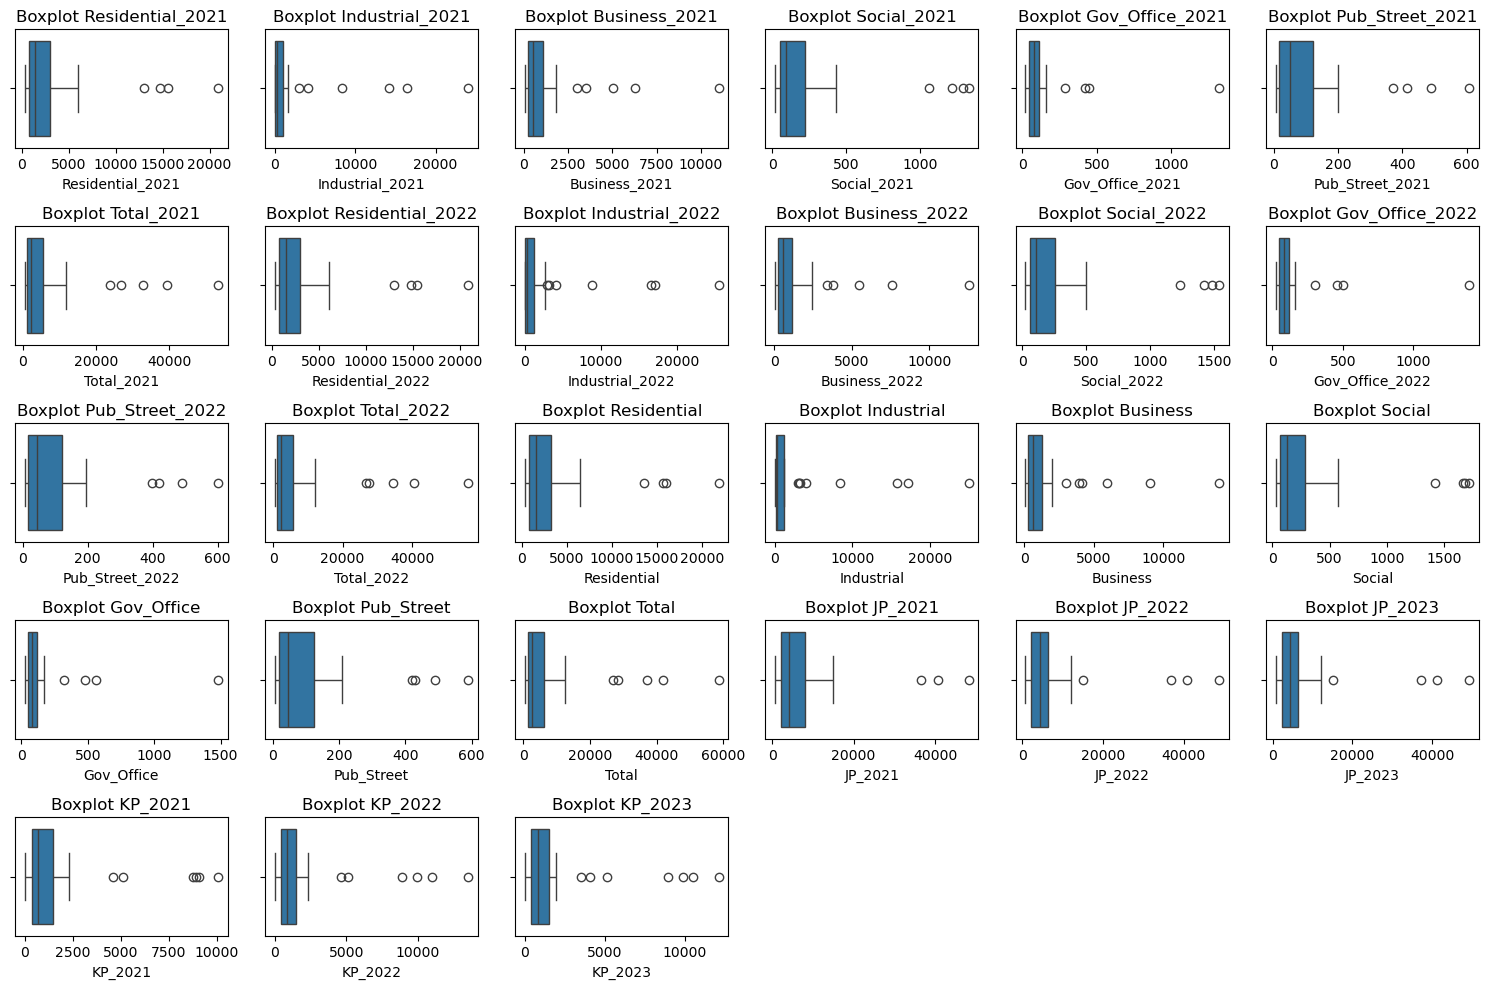

In [3]:
numeric_columns = data_final.select_dtypes(include=['float64', 'int64']).columns
print(data_final[numeric_columns].describe())

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 6, i)  
    sns.boxplot(x=data_final[column])
    plt.title(f"Boxplot {column}")
    plt.tight_layout()

plt.show()

In [4]:
z_scores = np.abs(zscore(data_final[numeric_columns]))

outliers = (z_scores > 2).all(axis=1)

outliers = (z_scores > 2).all(axis=1) 
outlier_rows = data_final[outliers]
print("Provinsi dengan Outliers berdasarkan Z-Score:")
print(outlier_rows[['Province', *numeric_columns]].head())


Provinsi dengan Outliers berdasarkan Z-Score:
Empty DataFrame
Columns: [Province, Residential_2021, Industrial_2021, Business_2021, Social_2021, Gov_Office_2021, Pub_Street_2021, Total_2021, Residential_2022, Industrial_2022, Business_2022, Social_2022, Gov_Office_2022, Pub_Street_2022, Total_2022, Residential, Industrial, Business, Social, Gov_Office, Pub_Street, Total, JP_2021, JP_2022, JP_2023, KP_2021, KP_2022, KP_2023]
Index: []

[0 rows x 28 columns]


C:\Users\Jeff\AppData\Local\Temp\ipykernel_14600\1304664817.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_14600\1304664817.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_14600\1304664817.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_14600\1304664817.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

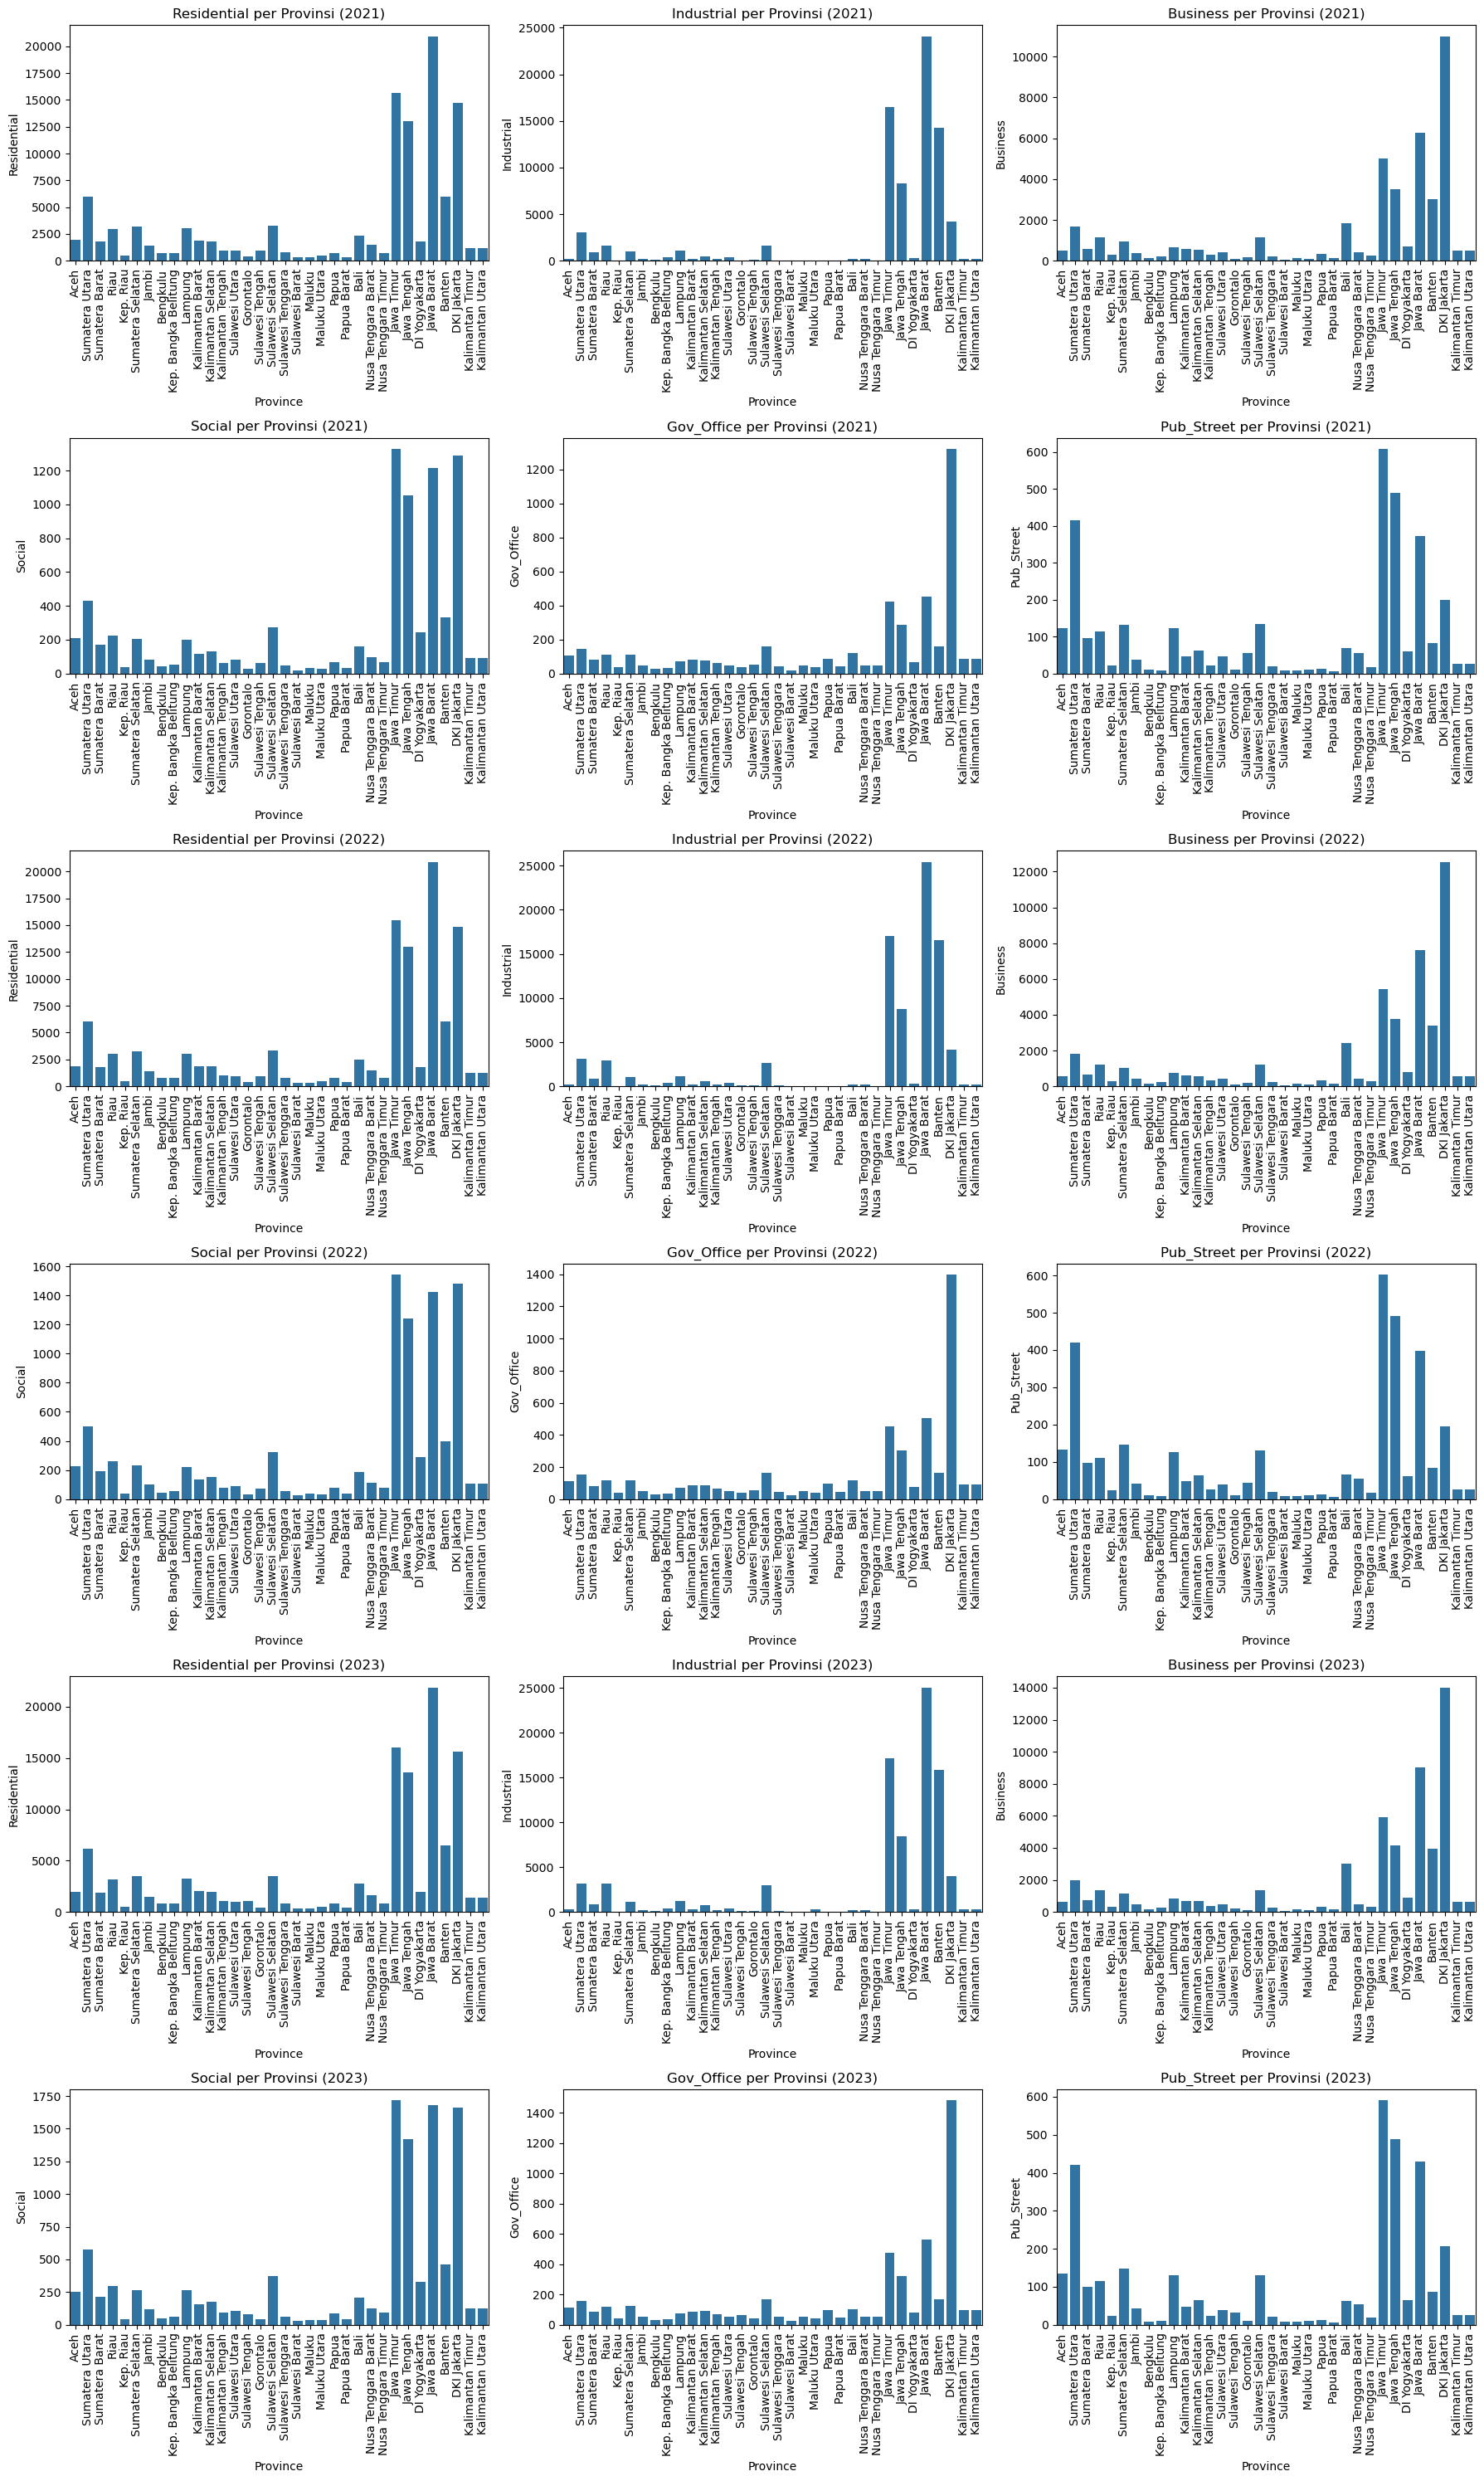

In [14]:
fig, axes = plt.subplots(6, 3, figsize=(18, 30))  
axes = axes.flatten() 

features = ['Residential', 'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street']

k = 0
for year, data in datasets.items():
    for feature in features:
        ax = axes[k]
        sns.barplot(x=data['Province'], y=data[feature], ax=ax)
        ax.set_title(f'{feature} per Provinsi ({year})')
        ax.set_xlabel('Province')
        ax.set_ylabel(feature)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        k += 1

plt.tight_layout()
plt.show()